In [9]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import os
import time
from tqdm import tqdm

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [10]:
file_path = os.listdir('/Users/dongzhang/6980/newMission/wind金融数据/CSRC INDUSTRIES/18FIrst-level')

In [11]:
industry_name = [x[:-4] for x in file_path]

In [12]:
# 去除了综合业，和缺失值很多的居民服务维修业
industry_name.remove('综合业')
industry_name.remove('居民服务维修业')


In [5]:
need_ = []
for f in range(len(file_path)):
    tmp = pd.read_csv('18FIrst-level/'+file_path[f],index_col=0)
    need_.append(tmp)
whole = pd.concat(need_)

In [6]:
whole.to_csv('all_first_level.csv')

In [7]:
# whole
df = pd.read_csv('all_first_level.csv',index_col=0)

In [8]:
start_time = time.time()
total_dict = {}
for j in tqdm(range(len(industry_name))):
# for j in tqdm(range(1)):
    one_industry_index = {}
    # 选定一个行业
    one_industry = df[df['first_level']==industry_name[j]]
    # 确定了行业之后确定这个行业所能覆盖的交易日
    days = one_industry['日期'].drop_duplicates()
    # print(days)
    for i in range(len(days)):
    # for i in range(1):
        # 确定一个行业在一个交易日的信息
        one_industry_one_day = one_industry[one_industry['日期']==days.iloc[i]]
        # print(one_industry_one_day)
        # 计算每一天的weight
        one_industry_one_day['weight']=one_industry_one_day.loc[:,'总市值(元)']/sum(one_industry_one_day.loc[:,'总市值(元)'])
        # 依据weight和收盘价构造行业指数
        one_industry_one_day_index = sum(one_industry_one_day.loc[:,'收盘价(元)']*one_industry_one_day.loc[:,'weight'])
        one_industry_index[days.iloc[i]]=one_industry_one_day_index
    total_dict[industry_name[j]] = one_industry_index
end_time = time.time()
print('time claupse: ',end_time-start_time)

  0%|          | 0/17 [00:00<?, ?it/s]<ipython-input-8-4a8bf840d730>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_industry_one_day['weight']=one_industry_one_day.loc[:,'总市值(元)']/sum(one_industry_one_day.loc[:,'总市值(元)'])
100%|██████████| 17/17 [16:20<00:00, 57.69s/it]time claupse:  980.7938458919525



In [9]:
# one_industry = df[df['first_level']==industry_name[2]]
# # 确定了行业之后确定这个行业所能覆盖的交易日
# days = one_industry['日期'].drop_duplicates()
# days = days.sort_values()
# one_industry_one_day = one_industry[one_industry['日期']==days.iloc[2]]
# one_industry_one_day['weight']=one_industry_one_day.loc[:,'总市值(元)']/sum(one_industry_one_day.loc[:,'总市值(元)'])
#         # 依据weight和收盘价构造行业指数
# one_industry_one_day_index = sum(one_industry_one_day.loc[:,'收盘价(元)']*one_industry_one_day.loc[:,'weight'])

In [10]:
all_index = pd.DataFrame(total_dict)

In [11]:
all_index

,交通运输仓储邮政业,建筑业,住宿和餐饮业,科学研究和技术服务业,制造业,采矿业,文体娱乐业,教育业,信息传输、软件和信息技术服务业,金融业,租赁和商务服务业,水利、环境和公共设施管理业,农林牧渔业,电热燃水生产和供应业,批发和零售业,房地产业,卫生和社会工作业
2010-01-04,7.005931,5.090230,10.756080,7.859379,12.800408,11.123579,8.143650,7.699249,7.606352,8.542631,6.123693,7.303913,10.252502,5.584991,12.142908,6.737798,4.354285
2010-01-05,7.125188,5.100777,10.907413,7.952858,12.882768,11.402229,8.271172,7.725300,7.777026,8.728384,6.165599,7.415679,10.339631,5.633681,12.157330,6.589453,4.473942
2010-01-06,7.113563,5.090035,10.684526,8.139235,12.797978,11.359237,8.285416,7.747768,7.745245,8.522742,6.083194,7.355423,10.183972,5.631910,12.128396,6.603233,4.435741
2010-01-07,6.954008,5.016476,10.691854,8.114025,12.562575,11.185873,8.135062,7.657150,7.596896,8.361947,6.050425,7.132633,9.969134,5.512292,11.862566,6.568515,4.560753
2010-01-08,6.986291,5.032034,11.057088,8.217534,12.488695,11.042990,8.285012,7.809370,7.728896,8.389650,6.081950,7.207351,10.026257,5.527089,11.932261,6.656796,4.663193
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,23.599079,6.441243,29.031935,89.605461,167.262983,8.974083,23.625177,35.163617,63.081196,22.120432,133.066912,16.990365,39.875878,8.908698,20.876564,13.032435,110.469392
2020-12-28,23.447343,6.346646,28.847053,88.480567,172.385525,8.978999,24.567011,35.538017,62.769802,22.395561,132.385230,16.471177,41.613071,8.878321,20.649524,13.104265,109.982095
2020-12-29,23.382389,6.370608,29.674703,88.333559,171.649642,8.727525,25.182039,32.170851,62.842435,22.583319,130.020992,16.248154,41.113276,8.675366,20.308402,13.148482,110.315634
2020-12-30,23.983348,6.366194,29.646159,89.331389,179.465855,8.780651,25.537449,31.849643,65.031569,22.769199,135.597177,16.197667,40.952255,8.692465,20.351363,13.056755,111.712421


In [12]:
all_index.sort_index(inplace=True)

In [13]:
all_index.to_csv('all_first_level_10_20.csv')

In [14]:
all_index['日期']=all_index.index
all_index['year'] = all_index.apply(lambda x:x['日期'][:-6],axis=1)
years = all_index.year.drop_duplicates()
for i in range(len(years)):
    year1 = all_index[all_index.year==years[i]][:-1]
    year1.set_index(year1['year'])
    year1 = year1.drop(['日期','year'],axis=1)
    dyear = year1.pct_change(periods=1)
    dyear = (dyear-dyear.mean())/dyear.std()
    corr = dyear.corr()
    corr.to_csv(years[i]+' first-level corr.csv')

In [13]:
all_index = pd.read_csv('all_first_level_10_20.csv',index_col=0)

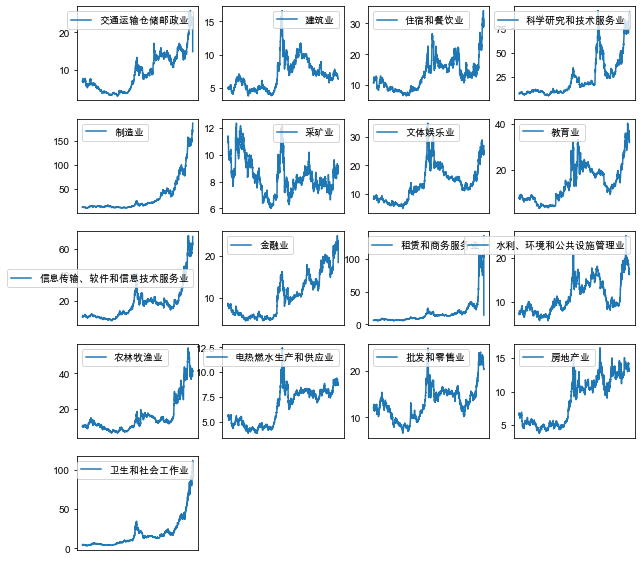

In [14]:
plt.figure(figsize=(10,10))
# for i in range
# ind = [all_index.iloc[:,1].index[i][:-3] if i%360==0 else ' ' for i in range(0, 2674)]
for i in range(17):
    plt.subplot(5,4,i+1)
    plt.plot(all_index.iloc[:,2].index,all_index.iloc[:,i].values,label=f'{industry_name[i]}')
    plt.xticks([])
    plt.legend()
plt.show()

## ------------------------

In [21]:
建筑业=pd.read_csv('/Users/dongzhang/6980/newMission/wind金融数据/CSRC INDUSTRIES/18FIrst-level/建筑业.csv')
# 建筑业 = 建筑业[建筑业['日期']==2020-12-30]
# # 
# 建筑业

In [23]:
建筑业=建筑业[建筑业['日期']=='2020-12-30']

In [24]:
建筑业.sort_values(by='总市值(元)')

,代码,简称,日期,开盘价(元),收盘价(元),总市值(元),industry,month,year,first_level
3936,900939.SH,汇丽B,2020-12-30,0.73,0.76,9.034643e+08,建筑装饰和其他安装业,2020-12,2020,建筑业
15428,002830.SZ,名雕股份,2020-12-30,10.35,10.38,1.384069e+09,建筑装饰和其他安装业,2020-12,2020,建筑业
87917,603316.SH,诚邦股份,2020-12-30,7.32,7.30,1.483944e+09,土木工程建筑业,2020-12,2020,建筑业
114496,300517.SZ,海波重科,2020-12-30,15.68,15.73,1.678800e+09,土木工程建筑业,2020-12,2020,建筑业
93177,603007.SH,花王股份,2020-12-30,5.40,5.34,1.792735e+09,土木工程建筑业,2020-12,2020,建筑业
...,...,...,...,...,...,...,...,...,...,...
70707,601669.SH,中国电建,2020-12-30,3.82,3.82,5.844231e+10,土木工程建筑业,2020-12,2020,建筑业
102120,601186.SH,中国铁建,2020-12-30,7.88,7.83,1.063278e+11,土木工程建筑业,2020-12,2020,建筑业
154833,601800.SH,中国交建,2020-12-30,7.26,7.21,1.165548e+11,土木工程建筑业,2020-12,2020,建筑业
157507,601390.SH,中国中铁,2020-12-30,5.21,5.22,1.282603e+11,土木工程建筑业,2020-12,2020,建筑业


In [25]:
建筑业=pd.read_csv('/Users/dongzhang/6980/newMission/wind金融数据/CSRC INDUSTRIES/18FIrst-level/建筑业.csv')

In [26]:
中国建筑 = 建筑业[建筑业['简称']=='中国建筑']


<AxesSubplot:>

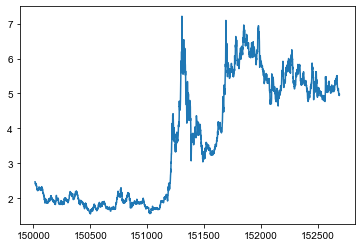

In [28]:
中国建筑['收盘价(元)'].plot()

<AxesSubplot:ylabel='Frequency'>

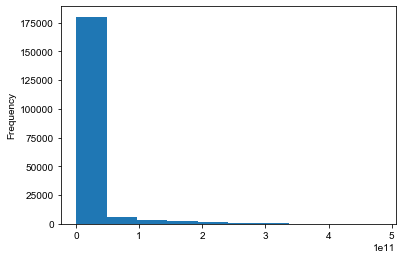

In [29]:
建筑业['总市值(元)'].plot(kind='hist')

In [31]:
year1 = all_index[all_index.year=='2020'][:-1]
year1.set_index(year1['year'])
year1 = year1.drop(['日期','year'],axis=1)
dyear = year1.pct_change(periods=1)
dyear = (dyear-dyear.mean())/dyear.std()
corr = dyear.corr()

<AxesSubplot:ylabel='Frequency'>

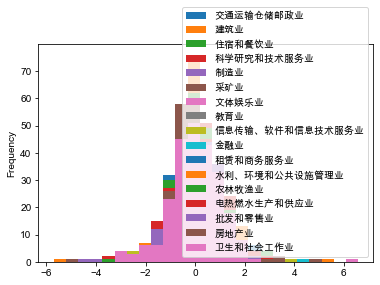

In [35]:
dyear.plot(kind='hist',bins=25)